## Prepare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [73]:
df = pd.read_csv('vehicles_20-10-2020.csv')

In [74]:
df['cylinders'] = df['cylinders'].replace('other', np.nan)
df.loc[df['cylinders'].notnull(), 'cylinders'] = df.loc[df['cylinders'].notnull(), 'cylinders'].astype(int)

In [75]:
df.loc[df['year'].notnull(), 'year'] = df.loc[df['year'].notnull(), 'year'].astype(int)

In [70]:
#df = df[(df['lat'].notna() & df['long'].notna())]

## Filter data we want to analysis

In [76]:
# Filter
df.drop(df.loc[(df.year<2005)].index, axis=0, inplace=True)
df.drop(df.loc[(df.price>15000)|(df.price<3000)].index, axis=0, inplace=True)
df.drop(df.loc[(df.year>2019)].index, axis=0, inplace=True)
df.drop(df.loc[(df.odometer>180000)].index, axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [77]:
df.shape

(9944, 20)

We're dealing with 34 unique manufacturers, 6 unique conditions, and 4 car sizes 30 cities.


## Cleanning

### model year

In [78]:
df["model_year"] = df["model"] + '_'+  df["year"].astype(str)

In [79]:
columns = ['city', 'state', 'price', 'year', 'make', 'model',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long','model_year']

cars = df[columns]

In [80]:
cars.columns

Index(['city', 'state', 'price', 'year', 'make', 'model', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'lat', 'long', 'model_year'],
      dtype='object')

### State Info

In [65]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises", timeout=None)

def city_state_country(coord, recursion=0):
    try: 
        return geolocator.reverse(coord, exactly_one= True).raw['address'].get('state', '')
    except GeocoderTimedOut as e:
        if recursion > 10:      # max recursions
            raise e
        time.sleep(1) # wait a bit
        # try again
        return city_state_country(coord, recursion=recursion + 1)
    # location = geolocator.reverse(coord, timeout=10000).raw['address'].get('state', '')
   # address = location.raw['address']
   # city = address.get('city', '')
   # state = address.get('state', '')
   # country = address.get('country', '')
   # return state

In [66]:
cars['state'] = (cars[['lat', 'long']].astype(str)\
                 .apply(lambda row: city_state_country(', '.join(row)),
                          axis=1)
                 )

/Users/xueni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  


NameError: name 'GeocoderTimedOut' is not defined

## EDA


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab3b809e90>],
      dtype=object)

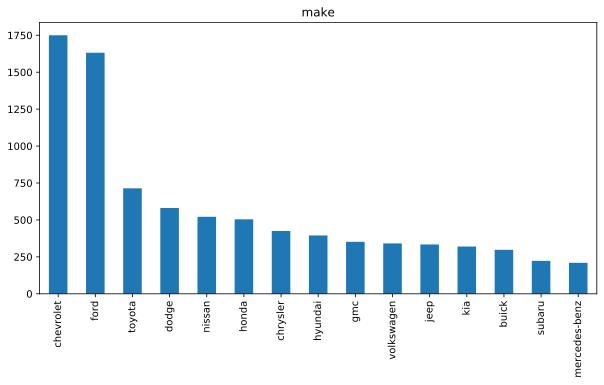

In [82]:
cars.make.value_counts().head(15).plot(kind='bar', 
                                             subplots=True, figsize=(10, 5))

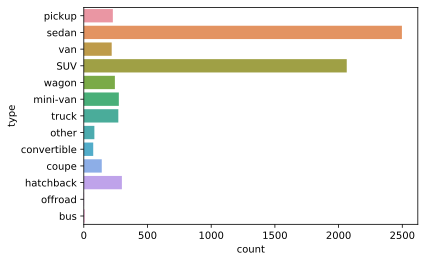

In [83]:
sns.countplot(y='type', data=cars)

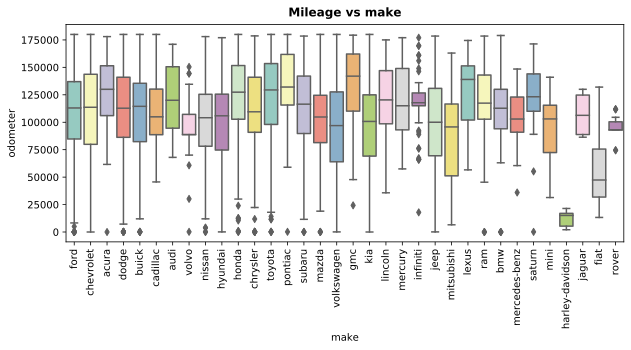

In [88]:
plt.figure(figsize=(10,4))
g=sns.boxplot(x="make", y="odometer",
                 data=cars, palette="Set3")
plt.title("Mileage vs make", fontsize=12, y=1.01,weight='bold')

for item in g.get_xticklabels():
    item.set_rotation(90)

plt.show()